In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
for column in df.columns:
    print('{a} : {b}'.format(a=column,b=df[column].nunique()))

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


In [6]:
numerical=['age','trestbps','chol','thalach','oldpeak']
categorical=list(set(df.columns)-set(numerical))

In [7]:
df_num=df[numerical]
df_cat=df[categorical]

In [8]:
df_num.head() , df_cat.head()

(   age  trestbps  chol  thalach  oldpeak
 0   63       145   233      150      2.3
 1   37       130   250      187      3.5
 2   41       130   204      172      1.4
 3   56       120   236      178      0.8
 4   57       120   354      163      0.6,
    sex  cp  restecg  exang  thal  ca  slope  fbs  target
 0    1   3        0      0     1   0      0    1       1
 1    1   2        1      0     2   0      0    0       1
 2    0   1        0      0     2   0      2    0       1
 3    1   1        1      0     2   0      2    0       1
 4    0   0        1      1     2   0      2    0       1)

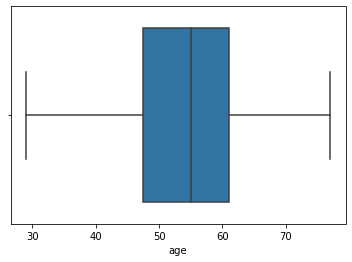

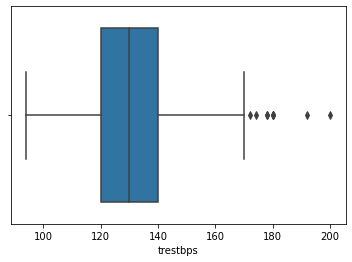

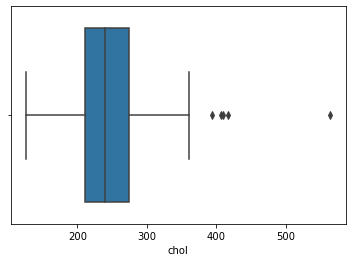

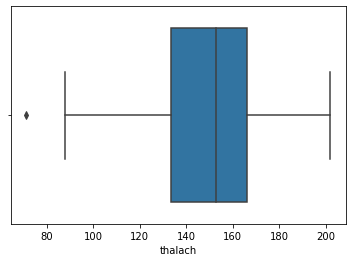

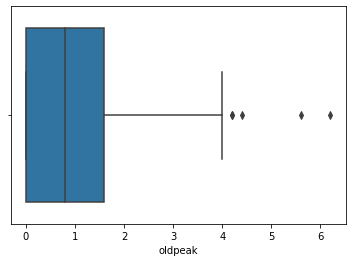

In [9]:
for column in df_num.columns:
    sns.boxplot(df_num[column])
    plt.show()

In [10]:
scaler=StandardScaler()
scaler.fit(df_num)
df_num_sc=pd.DataFrame(scaler.transform(df_num),columns=numerical)

In [11]:
for column in df_num_sc.columns:
    df_num_sc.loc[np.abs(df_num_sc[column]) > 2.5] = np.mean(df[column])

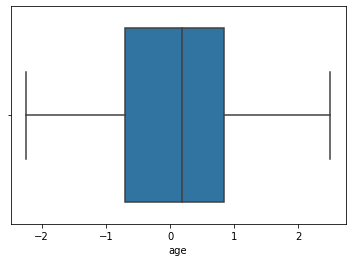

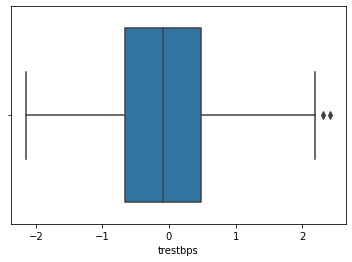

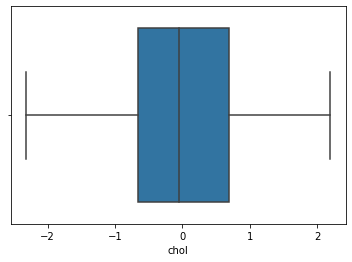

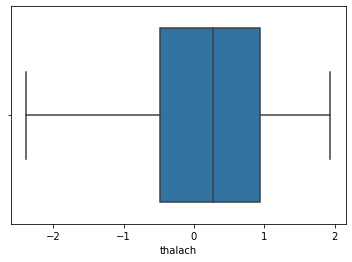

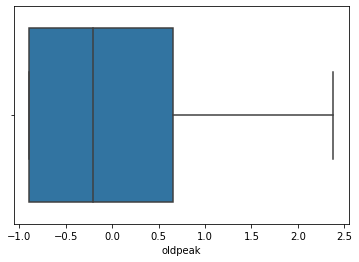

In [12]:
for column in df_num_sc.columns:
    sns.boxplot(df_num_sc[column])
    plt.show()

In [13]:
df_num=pd.DataFrame(scaler.inverse_transform(df_num_sc),columns=numerical)

In [14]:
df_2=pd.concat([df_num,df_cat],axis=1)

In [15]:
df_2.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,restecg,exang,thal,ca,slope,fbs,target
0,63.0,145.0,233.0,150.0,2.3,1,3,0,0,1,0,0,1,1
1,37.0,130.0,250.0,187.0,3.5,1,2,1,0,2,0,0,0,1
2,41.0,130.0,204.0,172.0,1.4,0,1,0,0,2,0,2,0,1
3,56.0,120.0,236.0,178.0,0.8,1,1,1,0,2,0,2,0,1
4,57.0,120.0,354.0,163.0,0.6,0,0,1,1,2,0,2,0,1


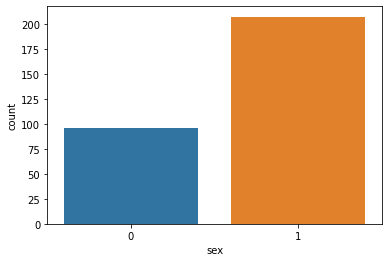

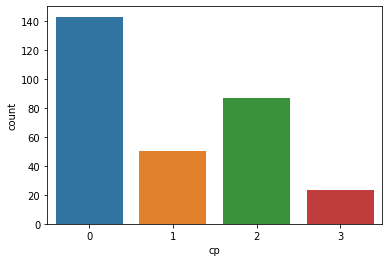

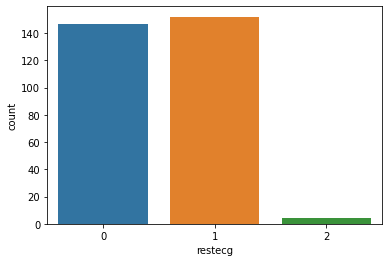

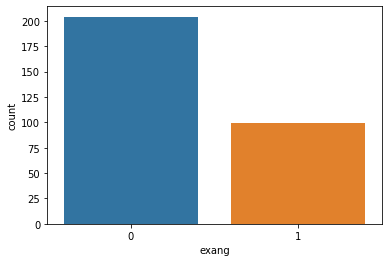

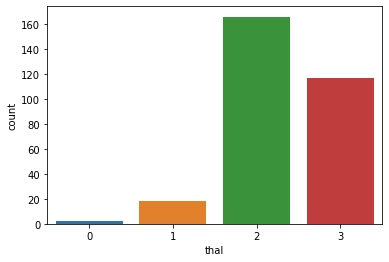

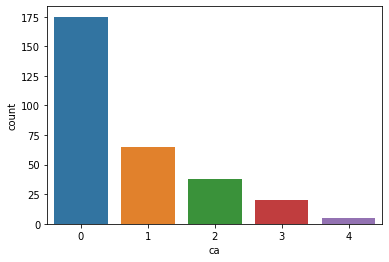

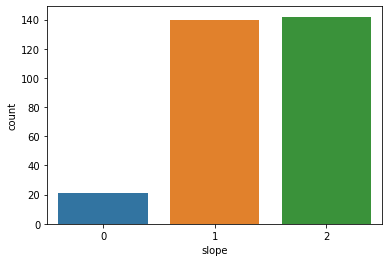

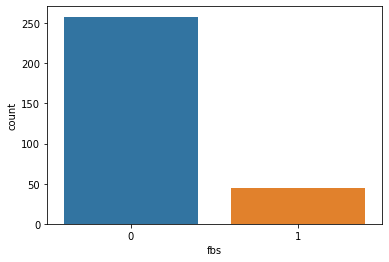

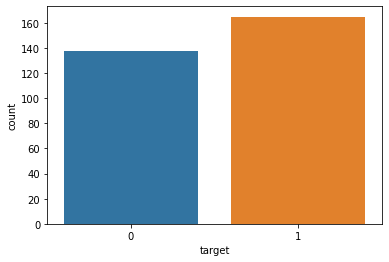

In [16]:
for column in df_cat.columns:
    sns.countplot(df[column])
    plt.show()

In [17]:
for column in df_cat.columns:
    for cat in df_cat[column].unique():
        prop=df_cat[column][df[column]==cat].count()/df_cat[column].count()
        if prop <=0.07:
            print ('{} : {}'.format(column,cat))

restecg : 2
thal : 1
thal : 0
ca : 3
ca : 4
slope : 0


In [18]:
df_2=df_2[df_2['thal']!=0]
df_2=df_2[df_2['thal']!=1]
df_2=df_2[df_2['restecg']!=2]
df_2=df_2[df_2['slope']!=3]
df_2=df_2[df_2['ca']!=3]
df_2=df_2[df_2['ca']!=4]

In [19]:
df_2.reset_index(inplace=True)

In [20]:
df_2

,index,age,trestbps,chol,thalach,oldpeak,sex,cp,restecg,exang,thal,ca,slope,fbs,target
0,1,37.0,130.0,250.0,187.0,3.5,1,2,1,0,2,0,0,0,1
1,2,41.0,130.0,204.0,172.0,1.4,0,1,0,0,2,0,2,0,1
2,3,56.0,120.0,236.0,178.0,0.8,1,1,1,0,2,0,2,0,1
3,4,57.0,120.0,354.0,163.0,0.6,0,0,1,1,2,0,2,0,1
4,6,56.0,140.0,294.0,153.0,1.3,0,1,0,0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,298,57.0,140.0,241.0,123.0,0.2,0,0,1,1,3,0,1,0,0
253,299,45.0,110.0,264.0,132.0,1.2,1,3,1,0,3,0,1,0,0
254,300,68.0,144.0,193.0,141.0,3.4,1,0,1,0,3,2,1,1,0
255,301,57.0,130.0,131.0,115.0,1.2,1,0,1,1,3,1,1,0,0


In [21]:
X=df_2.drop(['target'],axis=1)
y=df_2['target']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=22,test_size=0.2)

In [23]:
model=XGBClassifier()

In [24]:
para={'n_estimators': np.arange(50,200,50),
     'max_depth': [1,2,3,4],
     'learning_rate':[0.1,0.01,0.001,0.0001],
     'min_child_weight':[0],
     'booster': ['gbtree','gblinear','dart']}

In [25]:
grid=GridSearchCV(estimator=model,param_grid=para,scoring='roc_auc',n_jobs=-1,verbose=1)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[16:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     val

In [27]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
grid.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 1,
 'min_child_weight': 0,
 'n_estimators': 50}

In [29]:
model=XGBClassifier(n_estimators=50,booster='gbtree',learning_rate=0.1,max_depth=1,min_child_weight=0)
model.fit(X_train,y_train)

[16:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
pred=model.predict(X_test)

In [31]:
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [32]:
c_mat=confusion_matrix(y_test,pred)

In [33]:
c_mat

array([[23,  0],
       [ 0, 29]], dtype=int64)

In [34]:
pred_train=model.predict(X_train)

In [35]:
c_matt=confusion_matrix(y_train,(pred_train))

In [36]:
c_matt

array([[ 84,   0],
       [  0, 121]], dtype=int64)